In [77]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob 
from sklearn.utils import shuffle
from skimage.transform import resize


In [78]:
ronaldo=glob.glob('CR7/*.JPG')

In [79]:
messi=glob.glob('MESSI/*.JPG')

In [80]:
neymer=glob.glob('NEYMAR/*.JPG')

In [81]:
ebappe=glob.glob('EBAPPE/*.JPG')

In [82]:
images=[]
label=[]
for i in ronaldo:
    img=plt.imread(i)
    images.append(img)
    label.append(1)

In [83]:
for i in messi:
    img=plt.imread(i)
    images.append(img)
    label.append(2)

In [84]:
for i in neymer:
    img=plt.imread(i)
    images.append(img)
    label.append(3)

In [85]:
for i in ebappe:
    img=plt.imread(i)
    images.append(img)
    label.append(4)

In [86]:
label_name={1:'ronaldo',2:'messi',3:'neymer',4:'ebappe'}

In [87]:
images,label=shuffle(images,label)

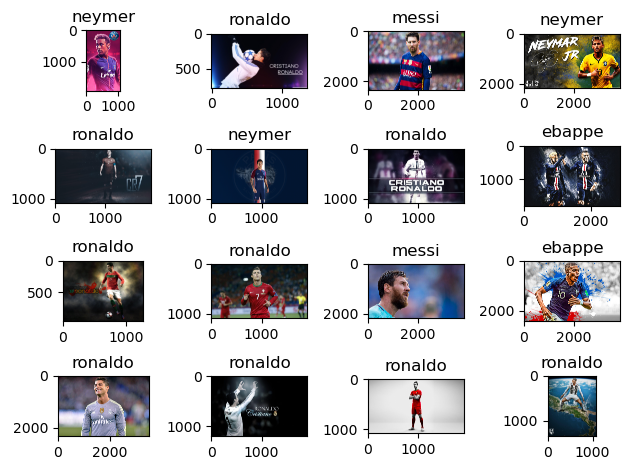

In [88]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(label_name[label[i]])
plt.tight_layout()

In [89]:
X=[]
for i in images:
    X.append(resize(i,(300,300,3)))

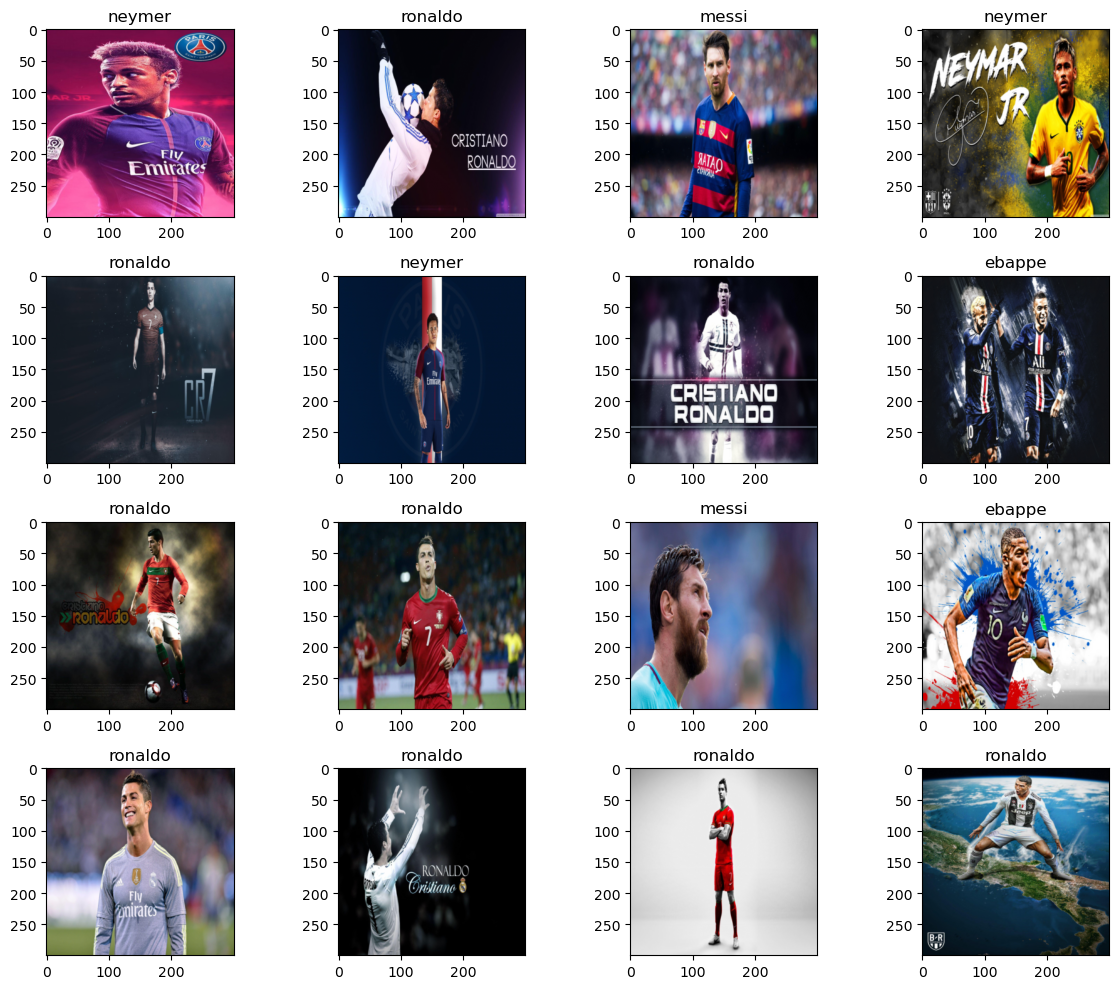

In [90]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i])
    plt.title(label_name[label[i]])
plt.tight_layout()

In [91]:
x=np.array(X)

In [92]:
y=np.array(label)

In [93]:
x.shape

(230, 300, 300, 3)

In [94]:
d1,d2,d3,d4=x.shape

In [95]:
x=x.reshape((d1,d2*d3*d4))

In [96]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [105]:
from sklearn.svm import SVC

In [106]:
model=SVC()

In [107]:
model.fit(x_train,y_train)

SVC()

In [108]:
y_pred=model.predict(x_test)

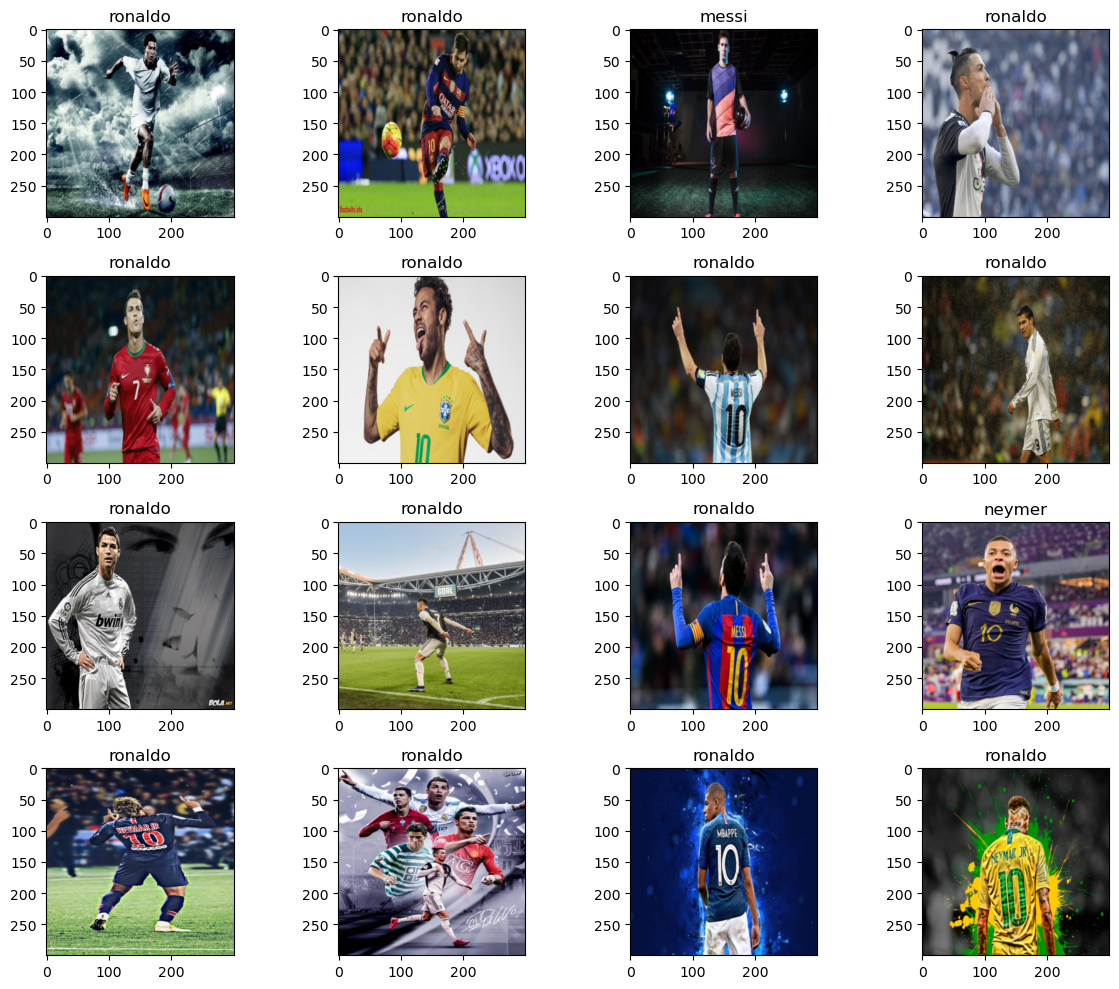

In [109]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(300,300,3))
    plt.title(label_name[y_pred[i]])
plt.tight_layout()

In [110]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [111]:
accuracy_score(y_test,y_pred)

0.45652173913043476

<AxesSubplot:>

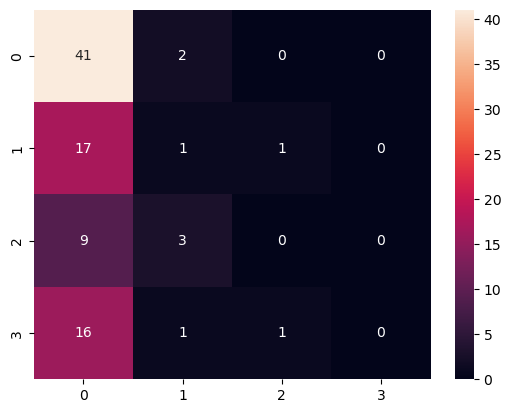

In [113]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.49      0.95      0.65        43
           2       0.14      0.05      0.08        19
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        18

    accuracy                           0.46        92
   macro avg       0.16      0.25      0.18        92
weighted avg       0.26      0.46      0.32        92



C:\Users\MUHAMMED YAZEEN I\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUHAMMED YAZEEN I\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUHAMMED YAZEEN I\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
